In [103]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pylab import plt
import seaborn
%matplotlib inline

In [104]:
featureSpace = gpd.read_file('../Data/processed/shapefiles/featureSpace_CT.shp')

In [105]:
X = featureSpace[[u'FC_Per', u'Median_Val',  u'Own_Occup',
                  u'PD_Per', u'Perm_Count', u'Tree_Score', u'Vacant_Per']].as_matrix()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [106]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

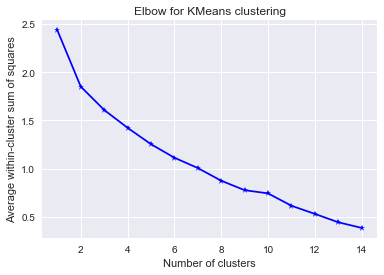

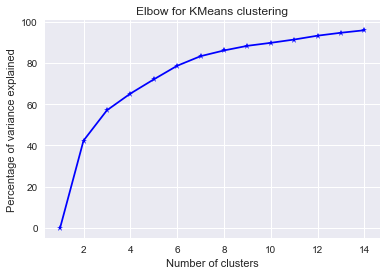

In [107]:
elbow(X_scaled, range(1,15))

In [108]:
n = 4
km = KMeans(random_state=123, n_clusters=n)
res = km.fit(X)

In [109]:
featureSpace['km_labels'] = res.labels_

In [111]:
clusters = featureSpace[[u'FC_Per', u'Median_Val',  u'Own_Occup',
                  u'PD_Per', u'Perm_Count', u'Tree_Score', u'Vacant_Per', 'km_labels']]

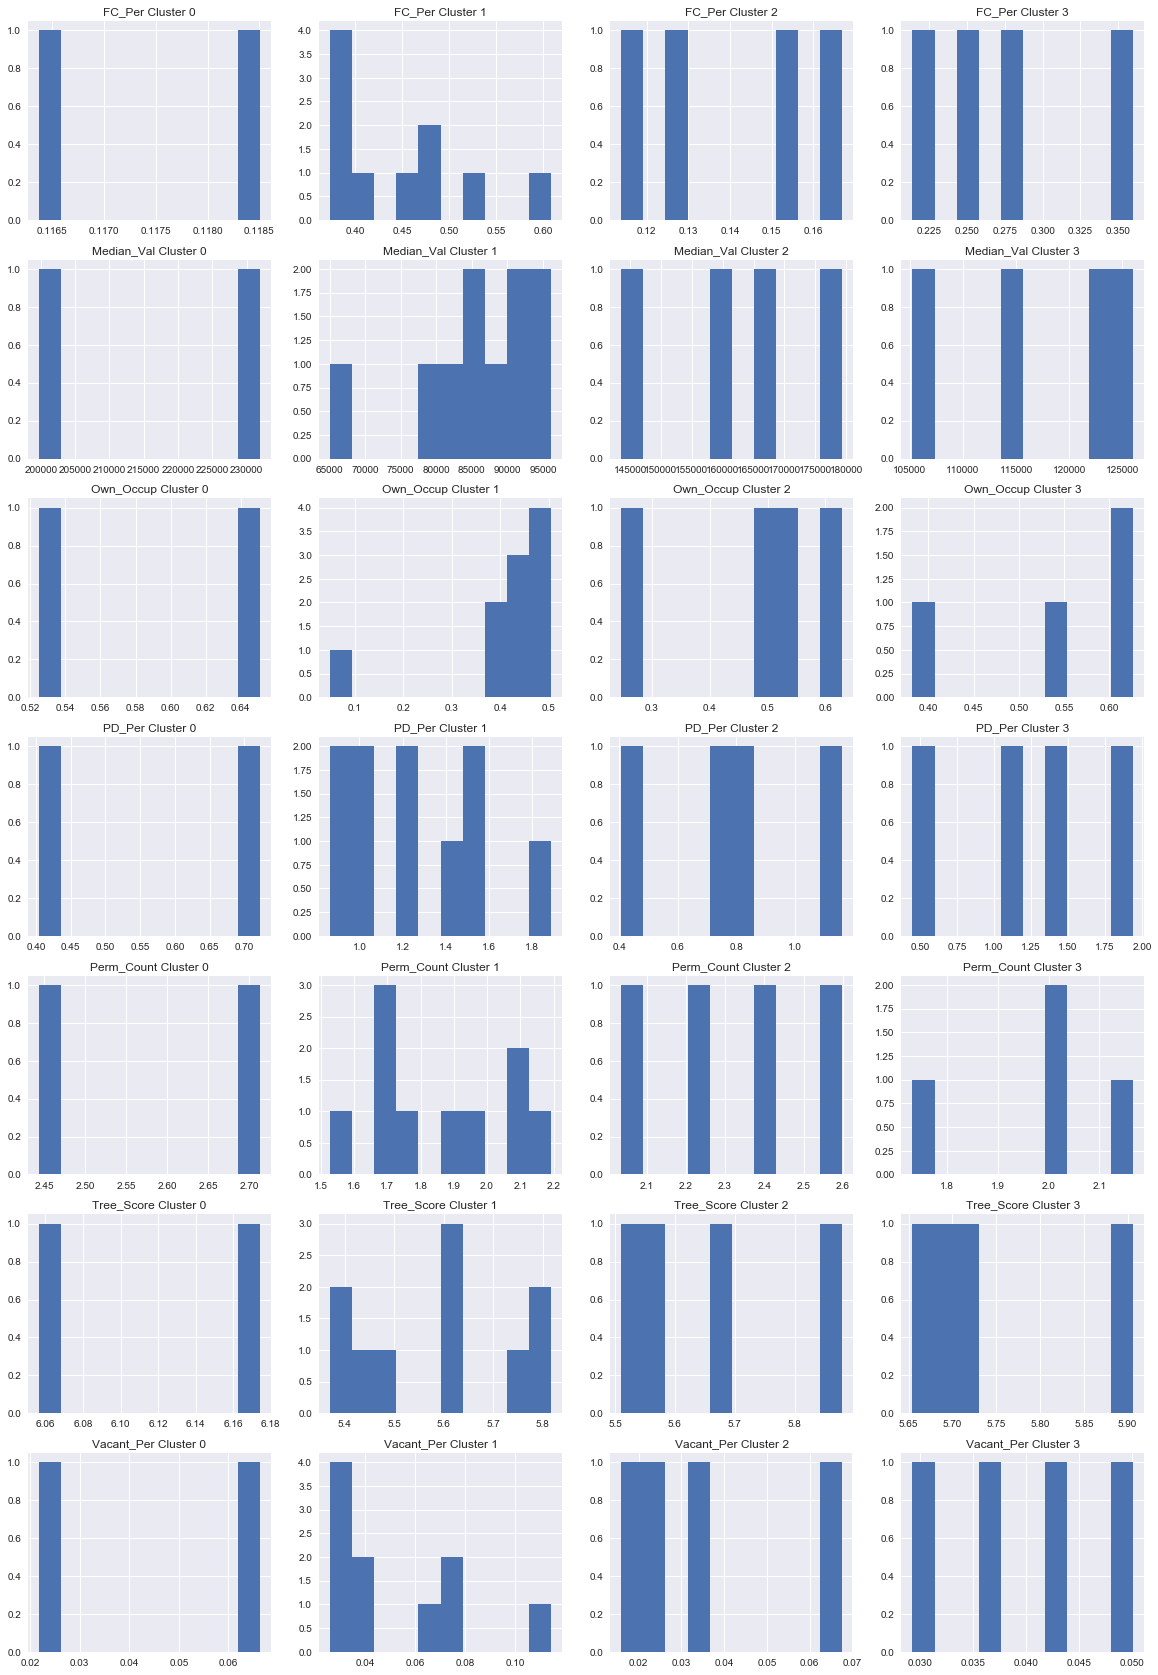

In [112]:
fig, axes = plt.subplots(7, 4, figsize=(20,30))
for row, column in zip(range(8), clusters.columns[:-1]):
    for i in range(4):
        cluster = clusters.loc[clusters['km_labels'] == i]
        axes[row,i].hist(cluster[column], bins=10)
        axes[row,i].set_title('{} Cluster {}'.format(column, i))

In [113]:
featureSpace.to_file('../Data/processed/shapefiles/featureSpace_CT_cluster.shp')